In [1]:
# Para este ejercicio, primero debe obtener los datos de gapminder de la URL
# de carpintería de software y cargarlos como marco de datos de pandas. Los
# datos de gapminder tienen información sobre la vida útil, la población y el pib
# de los países durante varios años.
#
#Para eso use el siguiente código:
#gapminder_csv_url ='http://bit.ly/2cLzoxH'
#gapminder = pandas.read_csv(gapminder_csv_url)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings


gapminder_csv_url ='http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(gapminder_csv_url)
print(gapminder.head(3))



       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


In [2]:
#1. Realice un resumen estadístico de sus datos.

print(gapminder.describe())


             year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900


In [5]:
#2. Agrupe por la variable “año”. Comente respecto al resultado al usar groupby.
gapminder.groupby('year')

# el resultado es un objeto de tipo DataFrameGroupBy, que es un objeto iterable
# que contiene los grupos y sus nombres. Para acceder a los grupos se puede
# iterar sobre el objeto o usar el método get_group().




In [6]:
#3. Ahora obtenga la suma (la cantidad), la media y la mediana para cada grupo, es decir, por año.


# fueron omitidas las columnas que no son numéricas...
print(gapminder[['year','pop','lifeExp','gdpPercap']].groupby('year').agg(['count','mean','median']))


       pop                           lifeExp                     gdpPercap   
     count          mean      median   count       mean   median     count   
year                                                                         
1952   142  1.695040e+07   3943953.0     142  49.057620  45.1355       142  \
1957   142  1.876341e+07   4282942.0     142  51.507401  48.3605       142   
1962   142  2.042101e+07   4686039.5     142  53.609249  50.8810       142   
1967   142  2.265830e+07   5170175.5     142  55.678290  53.8250       142   
1972   142  2.518998e+07   5877996.5     142  57.647386  56.5300       142   
1977   142  2.767638e+07   6404036.5     142  59.570157  59.6720       142   
1982   142  3.020730e+07   7007320.0     142  61.533197  62.4415       142   
1987   142  3.303857e+07   7774861.5     142  63.212613  65.8340       142   
1992   142  3.599092e+07   8688686.5     142  64.160338  67.7030       142   
1997   142  3.883947e+07   9735063.5     142  65.014676  69.3940

In [7]:
#4 ¿Sabías que en 1967 en Chile se inaugura el Aeropuerto Internacional Arturo Merino Benítez? Usando estos datos se puede especificar un año
# y obtener un marco de datos más pequeño para el año usando la función get_group(). Por ejemplo, podemos obtener el marco de datos
# agrupados para el año 1967. Comenta tus resultados. Escoge otro año explicando el porqué de la elección y qué resultados obtuviste.

print(gapminder.groupby(['year']).get_group((1967)).head(3))
print()
print(gapminder.groupby(['year','country']).get_group((1967, 'Albania')).head(3))



        country  year         pop continent  lifeExp    gdpPercap
3   Afghanistan  1967  11537966.0      Asia   34.020   836.197138
15      Albania  1967   1984060.0    Europe   66.220  2760.196931
27      Algeria  1967  12760499.0    Africa   51.407  3246.991771

    country  year        pop continent  lifeExp    gdpPercap
15  Albania  1967  1984060.0    Europe    66.22  2760.196931


In [9]:
# Ahora con los datos anteriores construya tablas pivote según las siguientes instrucciones:
# 1. Construya una tabla fijando “continent”, con las funciones vistas en clase

print(gapminder.pivot_table(index='continent',aggfunc='count'))
print()
print(gapminder.pivot_table(index='continent',values='pop', aggfunc=['count','mean']))




           country  gdpPercap  lifeExp  pop  year
continent                                        
Africa         624        624      624  624   624
Americas       300        300      300  300   300
Asia           396        396      396  396   396
Europe         360        360      360  360   360
Oceania         24         24       24   24    24

          count          mean
            pop           pop
continent                    
Africa      624  9.916003e+06
Americas    300  2.450479e+07
Asia        396  7.703872e+07
Europe      360  1.716976e+07
Oceania      24  8.874672e+06


In [10]:
# 2. Realice una tabla de doble entrada, fijando “continent” y “year”. Comente sus resultados.

print(gapminder.pivot_table(index='year',columns='continent',values='pop', aggfunc=['count','mean']))




           count                                       mean                
continent Africa Americas Asia Europe Oceania        Africa     Americas   
year                                                                       
1952          52       25   33     30       2  4.570010e+06  13806097.84  \
1957          52       25   33     30       2  5.093033e+06  15478156.64   
1962          52       25   33     30       2  5.702247e+06  17330810.16   
1967          52       25   33     30       2  6.447875e+06  19229864.92   
1972          52       25   33     30       2  7.305376e+06  21175368.40   
1977          52       25   33     30       2  8.328097e+06  23122707.96   
1982          52       25   33     30       2  9.602857e+06  25211636.80   
1987          52       25   33     30       2  1.105450e+07  27310158.84   
1992          52       25   33     30       2  1.267464e+07  29570964.16   
1997          52       25   33     30       2  1.430448e+07  31876016.40   
2002        

In [11]:
# 3. Con las variables anteriores, obtenga el promedio de la variable “pop”.

print(gapminder.pivot_table(index='year',columns='continent',values='pop', aggfunc=['mean']))



                   mean                                                     
continent        Africa     Americas          Asia        Europe     Oceania
year                                                                        
1952       4.570010e+06  13806097.84  4.228356e+07  1.393736e+07   5343003.0
1957       5.093033e+06  15478156.64  4.735699e+07  1.459635e+07   5970988.0
1962       5.702247e+06  17330810.16  5.140476e+07  1.534517e+07   6641759.0
1967       6.447875e+06  19229864.92  5.774736e+07  1.603930e+07   7300207.0
1972       7.305376e+06  21175368.40  6.518098e+07  1.668784e+07   8053050.0
1977       8.328097e+06  23122707.96  7.225799e+07  1.723882e+07   8619500.0
1982       9.602857e+06  25211636.80  7.909502e+07  1.770890e+07   9197425.0
1987       1.105450e+07  27310158.84  8.700669e+07  1.810314e+07   9787207.5
1992       1.267464e+07  29570964.16  9.494825e+07  1.860476e+07  10459825.5
1997       1.430448e+07  31876016.40  1.025238e+08  1.896480e+07  11120715.0

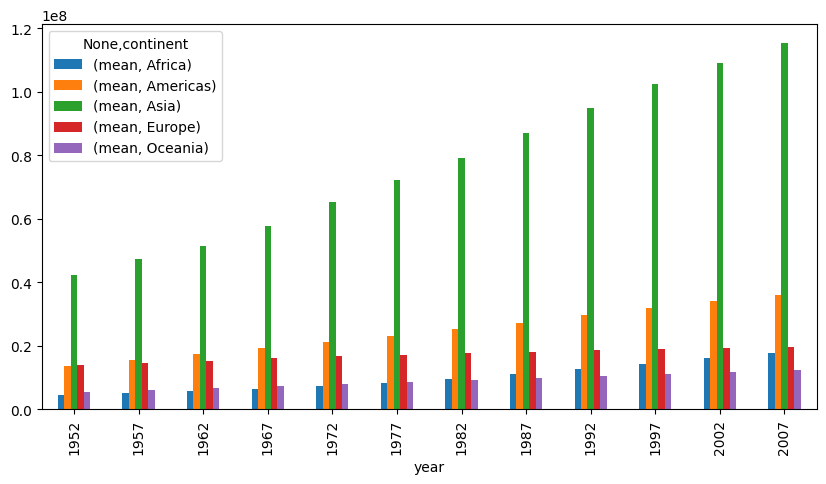

In [12]:
# 4. Obtenga un gráfico de barras del punto 3, comente sus resultados.

gapminder.pivot_table(index='year',columns='continent',values='pop', aggfunc=['mean']).plot(kind='bar',figsize=(10,5))
plt.show()

